In this worked notebook file,the Logistic Regression algorithm is applied to a dataset called wildfires.

The dataset has already been split into two different sets: one for training (wildfires_training.csv) and one for testing (wildfires_test.csv)

The dependent variable that we are trying to predict is fire, which can be one of 2 classes: yes or no.

In [2]:
import pandas as pd

# details for steel dataset
independent_cols = ["normalising_temperature", "tempering_temperature", "percent_silicon", "percent_chromium", "percent_copper", "percent_nickel", "percent_sulphur", "percent_carbon", "percent_manganese"]

dependent_col = "tensile_strength"

# Here we load our dataset in from file using the pandas library
df = pd.read_csv("steel.csv")
print(df.head())
print(df.info())
print(df.describe())

   normalising_temperature  tempering_temperature  percent_silicon  \
0                  178.500                    275           0.1530   
1                  178.500                    950           0.1530   
2                  178.500                    375           0.1530   
3                  178.500                    900           0.1530   
4                  189.525                    900           0.1624   

   percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
0          0.970575           0.942          0.8870              0.0   
1          1.212726           0.942          0.8870              0.0   
2          1.621165           0.942          0.8870              0.0   
3          0.809989           0.942          0.8870              0.0   
4          1.036229           0.849          0.9382              0.0   

   percent_carbon  percent_manganese  tensile_strength  
0           1.920                0.0         25.107613  
1           1.920               

In [3]:
#prepare features (X) and target (Y)
X = df.drop(columns=[dependent_col])
y = df[dependent_col]
print(X.head())
print(y.head())

   normalising_temperature  tempering_temperature  percent_silicon  \
0                  178.500                    275           0.1530   
1                  178.500                    950           0.1530   
2                  178.500                    375           0.1530   
3                  178.500                    900           0.1530   
4                  189.525                    900           0.1624   

   percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
0          0.970575           0.942          0.8870              0.0   
1          1.212726           0.942          0.8870              0.0   
2          1.621165           0.942          0.8870              0.0   
3          0.809989           0.942          0.8870              0.0   
4          1.036229           0.849          0.9382              0.0   

   percent_carbon  percent_manganese  
0           1.920                0.0  
1           1.920                0.0  
2           1.920            

In [5]:
from sklearn.model_selection import train_test_split
# Split data into training and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(442, 9)
(442,)
(111, 9)
(111,)


Prprocess the data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5])  # first 5 rows
print(X_test_scaled[:5])

[[-1.59465788  0.58010022  1.70886525 -0.26694053  0.84544237 -0.6420985
  -1.09423562  0.55903696 -0.91405018]
 [ 0.13343795  0.58010022  0.72612943  0.18517424 -1.30855631 -0.96124987
   0.5930015   0.33821443  0.60307101]
 [ 1.2555781   0.58010022 -0.53027967  1.20090553  0.93268534 -0.49752566
   1.51723249 -1.37316017  0.60307101]
 [ 0.02122394  0.77144672 -0.77907355  1.57724819  1.09814613 -0.08835724
  -1.09423562  0.50383133 -0.91405018]
 [ 1.10969988  0.58010022 -0.77907355 -0.29110469 -0.79713204  0.5253954
   0.21805992  0.4486257  -0.91405018]]
[[ 2.97245254  0.58010022 -0.77907355  1.76182189 -2.5570332   2.05295751
  -1.09423562 -0.48987005 -0.91405018]
 [-1.3937948   0.58010022 -0.77907355  1.26273437 -0.16236427  0.22806634
   1.08042555 -0.8431861   2.05401989]
 [ 2.17573303  0.58010022  0.67885859 -1.92840506  0.86499683 -1.66911124
   4.94232383 -2.4331083  -0.91405018]
 [ 0.14914791  0.58010022  0.72612943  1.38892437  0.69953604 -0.90805798
   0.21805992 -0.246965

10-fold cross validation on training data

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = SVR()

# Scores
mse_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=kf)

print("SVR Mean MSE:", -np.mean(mse_scores))
print("SVR Mean r2:", np.mean(r2_scores))

SVR Mean MSE: 6256.396996016918
SVR Mean r2: 0.19780059701305613


No hyperparameter tuning, default skikit-learn implementation

In [14]:
from sklearn import metrics

model.fit(X_train_scaled, y_train)

# compute predictions for training and test sets
predictions_training = model.predict(X_train_scaled)
predictions_test = model.predict(X_test_scaled)

# Evaluate
mse_train = metrics.mean_squared_error(y_train, predictions_training)
mse_test = metrics.mean_squared_error(y_test, predictions_test)
r2_train = metrics.r2_score(y_train, predictions_training)
r2_test = metrics.r2_score(y_test, predictions_test)

print("Training MSE:", mse_train)
print("Test MSE:", mse_test)
print("Training R²:", r2_train)
print("Test R²:", r2_test)

Training MSE: 5950.992033535848
Test MSE: 8150.949493475283
Training R²: 0.2480420804835466
Test R²: 0.166952382504021


Now we test the effect of hyperparameter tuning on the SVM model. We will use the RBF kernel and vary the values of C and gamma to see how they affect the accuracy of the model on both the training and test datasets.

In [16]:
from sklearn.model_selection import GridSearchCV

c_values =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

epsilon_values = [0.001, 0.01, 0.1, 0.5, 1, 10]

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best Parameters: {'C': 100, 'epsilon': 1.0}
Best MSE: 1223.607522091782


Plotting the comparision of training and test accuracy for different values of C and gamma

In [17]:
best_svr = grid_search.best_estimator_

from sklearn import metrics

# Predict on test data
y_pred_test = best_svr.predict(X_test_scaled)
y_pred_train = best_svr.predict(X_train_scaled)

# Compute error metrics
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
r2_train = metrics.r2_score(y_train, y_pred_train)
r2_test = metrics.r2_score(y_test, y_pred_test)

print("Best Model Performance:")
print("Training MSE:", mse_train)
print("Test MSE:", mse_test)
print("Training R²:", r2_train)
print("Test R²:", r2_test)

Best Model Performance:
Training MSE: 649.8122204447366
Test MSE: 1701.124101231399
Training R²: 0.9178907579428122
Test R²: 0.82614082190913


Here we create a pandas dataframe to better visualize the raw results of the hyperparameter tuning

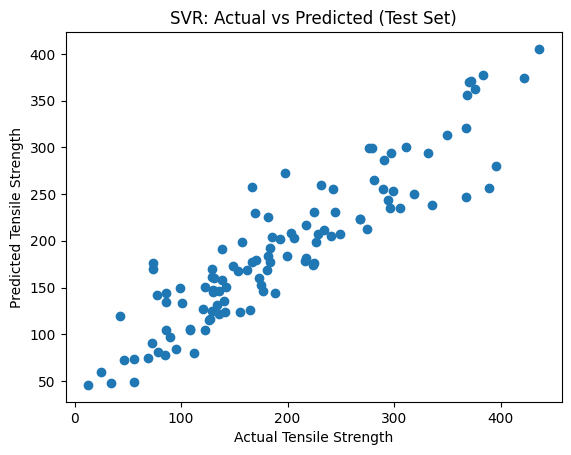

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Tensile Strength")
plt.ylabel("Predicted Tensile Strength")
plt.title("SVR: Actual vs Predicted (Test Set)")
plt.show()
